In [109]:
import pandas as pd 
import sqlite3
import seaborn as sns 


In [110]:
conn = sqlite3.connect('/home/rajarabii/projects/Football Européen avec le machine learning/database .sqlite')
conn.cursor()

In [111]:
Match = pd.read_sql('select * from match',conn)

In [112]:
list1 = []
for i in Match.columns:
    list1.append(i)
print(list1)

['id', 'country_id', 'league_id', 'season', 'stage', 'date', 'match_api_id', 'home_team_api_id', 'away_team_api_id', 'home_team_goal', 'away_team_goal', 'home_player_X1', 'home_player_X2', 'home_player_X3', 'home_player_X4', 'home_player_X5', 'home_player_X6', 'home_player_X7', 'home_player_X8', 'home_player_X9', 'home_player_X10', 'home_player_X11', 'away_player_X1', 'away_player_X2', 'away_player_X3', 'away_player_X4', 'away_player_X5', 'away_player_X6', 'away_player_X7', 'away_player_X8', 'away_player_X9', 'away_player_X10', 'away_player_X11', 'home_player_Y1', 'home_player_Y2', 'home_player_Y3', 'home_player_Y4', 'home_player_Y5', 'home_player_Y6', 'home_player_Y7', 'home_player_Y8', 'home_player_Y9', 'home_player_Y10', 'home_player_Y11', 'away_player_Y1', 'away_player_Y2', 'away_player_Y3', 'away_player_Y4', 'away_player_Y5', 'away_player_Y6', 'away_player_Y7', 'away_player_Y8', 'away_player_Y9', 'away_player_Y10', 'away_player_Y11', 'home_player_1', 'home_player_2', 'home_player_

In [113]:
Match = Match[['id', 'country_id', 'league_id', 'season','match_api_id', 'home_team_api_id', 'away_team_api_id', 'home_team_goal', 'away_team_goal']]
Match

,id,country_id,league_id,season,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,492473,9987,9993,1,1
1,2,1,1,2008/2009,492474,10000,9994,0,0
2,3,1,1,2008/2009,492475,9984,8635,0,3
3,4,1,1,2008/2009,492476,9991,9998,5,0
4,5,1,1,2008/2009,492477,7947,9985,1,3
...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,1992091,10190,10191,1,0
25975,25976,24558,24558,2015/2016,1992092,9824,10199,1,2
25976,25977,24558,24558,2015/2016,1992093,9956,10179,2,0
25977,25978,24558,24558,2015/2016,1992094,7896,10243,0,0


In [114]:
team = pd.read_sql('select * from team',conn)
team = team[['team_api_id','team_long_name']]
team

,team_api_id,team_long_name
0,9987,KRC Genk
1,9993,Beerschot AC
2,10000,SV Zulte-Waregem
3,9994,Sporting Lokeren
4,9984,KSV Cercle Brugge
...,...,...
294,10190,FC St. Gallen
295,10191,FC Thun
296,9777,Servette FC
297,7730,FC Lausanne-Sports


In [115]:
league = pd.read_sql('select * from league',conn)
league 

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [116]:
Match = Match.merge(league,left_on='league_id',right_on='id',how='left')
Match

,id_x,country_id_x,league_id,season,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,id_y,country_id_y,name
0,1,1,1,2008/2009,492473,9987,9993,1,1,1,1,Belgium Jupiler League
1,2,1,1,2008/2009,492474,10000,9994,0,0,1,1,Belgium Jupiler League
2,3,1,1,2008/2009,492475,9984,8635,0,3,1,1,Belgium Jupiler League
3,4,1,1,2008/2009,492476,9991,9998,5,0,1,1,Belgium Jupiler League
4,5,1,1,2008/2009,492477,7947,9985,1,3,1,1,Belgium Jupiler League
...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,1992091,10190,10191,1,0,24558,24558,Switzerland Super League
25975,25976,24558,24558,2015/2016,1992092,9824,10199,1,2,24558,24558,Switzerland Super League
25976,25977,24558,24558,2015/2016,1992093,9956,10179,2,0,24558,24558,Switzerland Super League
25977,25978,24558,24558,2015/2016,1992094,7896,10243,0,0,24558,24558,Switzerland Super League


In [117]:
Match = Match.merge(team,left_on='home_team_api_id',right_on='team_api_id',how='left')
Match = Match.merge(team,left_on='away_team_api_id',right_on='team_api_id',how='left')
Match

,id_x,country_id_x,league_id,season,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,id_y,country_id_y,name,team_api_id_x,team_long_name_x,team_api_id_y,team_long_name_y
0,1,1,1,2008/2009,492473,9987,9993,1,1,1,1,Belgium Jupiler League,9987,KRC Genk,9993,Beerschot AC
1,2,1,1,2008/2009,492474,10000,9994,0,0,1,1,Belgium Jupiler League,10000,SV Zulte-Waregem,9994,Sporting Lokeren
2,3,1,1,2008/2009,492475,9984,8635,0,3,1,1,Belgium Jupiler League,9984,KSV Cercle Brugge,8635,RSC Anderlecht
3,4,1,1,2008/2009,492476,9991,9998,5,0,1,1,Belgium Jupiler League,9991,KAA Gent,9998,RAEC Mons
4,5,1,1,2008/2009,492477,7947,9985,1,3,1,1,Belgium Jupiler League,7947,FCV Dender EH,9985,Standard de Liège
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,1992091,10190,10191,1,0,24558,24558,Switzerland Super League,10190,FC St. Gallen,10191,FC Thun
25975,25976,24558,24558,2015/2016,1992092,9824,10199,1,2,24558,24558,Switzerland Super League,9824,FC Vaduz,10199,FC Luzern
25976,25977,24558,24558,2015/2016,1992093,9956,10179,2,0,24558,24558,Switzerland Super League,9956,Grasshopper Club Zürich,10179,FC Sion
25977,25978,24558,24558,2015/2016,1992094,7896,10243,0,0,24558,24558,Switzerland Super League,7896,Lugano,10243,FC Zürich


In [118]:
Match = Match.drop(columns=['team_api_id_x','team_api_id_y'])
Match

,id_x,country_id_x,league_id,season,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,id_y,country_id_y,name,team_long_name_x,team_long_name_y
0,1,1,1,2008/2009,492473,9987,9993,1,1,1,1,Belgium Jupiler League,KRC Genk,Beerschot AC
1,2,1,1,2008/2009,492474,10000,9994,0,0,1,1,Belgium Jupiler League,SV Zulte-Waregem,Sporting Lokeren
2,3,1,1,2008/2009,492475,9984,8635,0,3,1,1,Belgium Jupiler League,KSV Cercle Brugge,RSC Anderlecht
3,4,1,1,2008/2009,492476,9991,9998,5,0,1,1,Belgium Jupiler League,KAA Gent,RAEC Mons
4,5,1,1,2008/2009,492477,7947,9985,1,3,1,1,Belgium Jupiler League,FCV Dender EH,Standard de Liège
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,1992091,10190,10191,1,0,24558,24558,Switzerland Super League,FC St. Gallen,FC Thun
25975,25976,24558,24558,2015/2016,1992092,9824,10199,1,2,24558,24558,Switzerland Super League,FC Vaduz,FC Luzern
25976,25977,24558,24558,2015/2016,1992093,9956,10179,2,0,24558,24558,Switzerland Super League,Grasshopper Club Zürich,FC Sion
25977,25978,24558,24558,2015/2016,1992094,7896,10243,0,0,24558,24558,Switzerland Super League,Lugano,FC Zürich


In [119]:
Match['total_goal'] = Match['home_team_goal']+Match['away_team_goal']
Match

,id_x,country_id_x,league_id,season,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,id_y,country_id_y,name,team_long_name_x,team_long_name_y,total_goal
0,1,1,1,2008/2009,492473,9987,9993,1,1,1,1,Belgium Jupiler League,KRC Genk,Beerschot AC,2
1,2,1,1,2008/2009,492474,10000,9994,0,0,1,1,Belgium Jupiler League,SV Zulte-Waregem,Sporting Lokeren,0
2,3,1,1,2008/2009,492475,9984,8635,0,3,1,1,Belgium Jupiler League,KSV Cercle Brugge,RSC Anderlecht,3
3,4,1,1,2008/2009,492476,9991,9998,5,0,1,1,Belgium Jupiler League,KAA Gent,RAEC Mons,5
4,5,1,1,2008/2009,492477,7947,9985,1,3,1,1,Belgium Jupiler League,FCV Dender EH,Standard de Liège,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,1992091,10190,10191,1,0,24558,24558,Switzerland Super League,FC St. Gallen,FC Thun,1
25975,25976,24558,24558,2015/2016,1992092,9824,10199,1,2,24558,24558,Switzerland Super League,FC Vaduz,FC Luzern,3
25976,25977,24558,24558,2015/2016,1992093,9956,10179,2,0,24558,24558,Switzerland Super League,Grasshopper Club Zürich,FC Sion,2
25977,25978,24558,24558,2015/2016,1992094,7896,10243,0,0,24558,24558,Switzerland Super League,Lugano,FC Zürich,0


In [120]:
Match.columns

Index(['id_x', 'country_id_x', 'league_id', 'season', 'match_api_id',
       'home_team_api_id', 'away_team_api_id', 'home_team_goal',
       'away_team_goal', 'id_y', 'country_id_y', 'name', 'team_long_name_x',
       'team_long_name_y', 'total_goal'],
      dtype='object')

In [121]:
league_dominate = Match.groupby('name').agg({
    'total_goal':'sum'
    
}).reset_index()
league_dominate

,name,total_goal
0,Belgium Jupiler League,4841
1,England Premier League,8240
2,France Ligue 1,7427
3,Germany 1. Bundesliga,7103
4,Italy Serie A,7895
5,Netherlands Eredivisie,7542
6,Poland Ekstraklasa,4656
7,Portugal Liga ZON Sagres,5201
8,Scotland Premier League,4804
9,Spain LIGA BBVA,8412


/tmp/ipykernel_31152/1694968374.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_goal', y='name', data=league_dominate, palette=palette)
/tmp/ipykernel_31152/1694968374.py:11: UserWarning: 
The palette list has fewer values (10) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='total_goal', y='name', data=league_dominate, palette=palette)


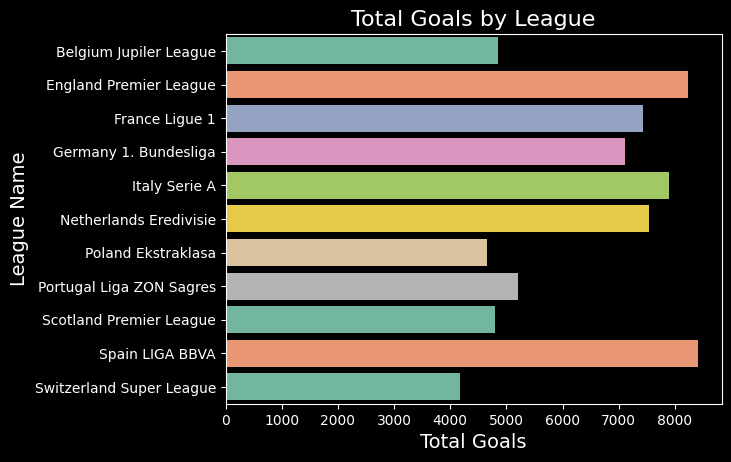

In [122]:
    import seaborn as sns
    import matplotlib.pyplot as plt

    # Définir le style sombre du fond
    plt.style.use('dark_background')

    # Choisir des couleurs distinctes pour les barplots
    palette = sns.color_palette("Set2", n_colors=10)

    # Créer le graphique avec des barres colorées
    sns.barplot(x='total_goal', y='name', data=league_dominate, palette=palette)

    # Ajouter des titres et des labels
    plt.title('Total Goals by League', fontsize=16, color='white')
    plt.xlabel('Total Goals', fontsize=14, color='white')
    plt.ylabel('League Name', fontsize=14, color='white')

    # Afficher le graphique
    plt.show()


In [123]:
Match = Match.rename(columns={'team_long_name_x':'team_home','team_long_name_y':'team_away'})

In [124]:
Match

,id_x,country_id_x,league_id,season,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,id_y,country_id_y,name,team_home,team_away,total_goal
0,1,1,1,2008/2009,492473,9987,9993,1,1,1,1,Belgium Jupiler League,KRC Genk,Beerschot AC,2
1,2,1,1,2008/2009,492474,10000,9994,0,0,1,1,Belgium Jupiler League,SV Zulte-Waregem,Sporting Lokeren,0
2,3,1,1,2008/2009,492475,9984,8635,0,3,1,1,Belgium Jupiler League,KSV Cercle Brugge,RSC Anderlecht,3
3,4,1,1,2008/2009,492476,9991,9998,5,0,1,1,Belgium Jupiler League,KAA Gent,RAEC Mons,5
4,5,1,1,2008/2009,492477,7947,9985,1,3,1,1,Belgium Jupiler League,FCV Dender EH,Standard de Liège,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,1992091,10190,10191,1,0,24558,24558,Switzerland Super League,FC St. Gallen,FC Thun,1
25975,25976,24558,24558,2015/2016,1992092,9824,10199,1,2,24558,24558,Switzerland Super League,FC Vaduz,FC Luzern,3
25976,25977,24558,24558,2015/2016,1992093,9956,10179,2,0,24558,24558,Switzerland Super League,Grasshopper Club Zürich,FC Sion,2
25977,25978,24558,24558,2015/2016,1992094,7896,10243,0,0,24558,24558,Switzerland Super League,Lugano,FC Zürich,0


In [125]:
total_goal_per_team_home = Match.groupby(['name','team_home']).agg({
    'home_team_goal':'sum'
}).reset_index()
total_goal_per_team_home

,name,team_home,home_team_goal
0,Belgium Jupiler League,Beerschot AC,112
1,Belgium Jupiler League,Club Brugge KV,235
2,Belgium Jupiler League,FCV Dender EH,21
3,Belgium Jupiler League,KAA Gent,213
4,Belgium Jupiler League,KAS Eupen,15
...,...,...,...
291,Switzerland Super League,FC Zürich,241
292,Switzerland Super League,Grasshopper Club Zürich,234
293,Switzerland Super League,Lugano,25
294,Switzerland Super League,Neuchâtel Xamax,106


In [126]:
total_goal_per_team_away = Match.groupby(['name','team_away']).agg({
    'away_team_goal':'sum'
}).reset_index()
total_goal_per_team_away

,name,team_away,away_team_goal
0,Belgium Jupiler League,Beerschot AC,62
1,Belgium Jupiler League,Club Brugge KV,186
2,Belgium Jupiler League,FCV Dender EH,23
3,Belgium Jupiler League,KAA Gent,177
4,Belgium Jupiler League,KAS Eupen,13
...,...,...,...
291,Switzerland Super League,FC Zürich,227
292,Switzerland Super League,Grasshopper Club Zürich,195
293,Switzerland Super League,Lugano,21
294,Switzerland Super League,Neuchâtel Xamax,65


In [127]:
total_goal_per_team_home = total_goal_per_team_home.rename(columns={'team_home': 'team', 'home_team_goal': 'home_goals'})
total_goal_per_team_away = total_goal_per_team_away.rename(columns={'team_away': 'team', 'away_team_goal': 'away_goals'})

# Fusionner les deux DataFrames sur 'name' (ligue) et 'team'
total_goals = pd.merge(total_goal_per_team_home, total_goal_per_team_away, on=['name', 'team'], how='outer')

# Calculer le total des buts
total_goals['total_goals'] = total_goals['home_goals'].fillna(0) + total_goals['away_goals'].fillna(0)

# Afficher le résultat final
total_goals = total_goals[['name', 'team', 'total_goals']]
print(total_goals)

                         name                     team  total_goals
0      Belgium Jupiler League             Beerschot AC          174
1      Belgium Jupiler League           Club Brugge KV          421
2      Belgium Jupiler League            FCV Dender EH           44
3      Belgium Jupiler League                 KAA Gent          390
4      Belgium Jupiler League                KAS Eupen           28
..                        ...                      ...          ...
291  Switzerland Super League                FC Zürich          468
292  Switzerland Super League  Grasshopper Club Zürich          429
293  Switzerland Super League                   Lugano           46
294  Switzerland Super League          Neuchâtel Xamax          171
295  Switzerland Super League              Servette FC           77

[296 rows x 3 columns]


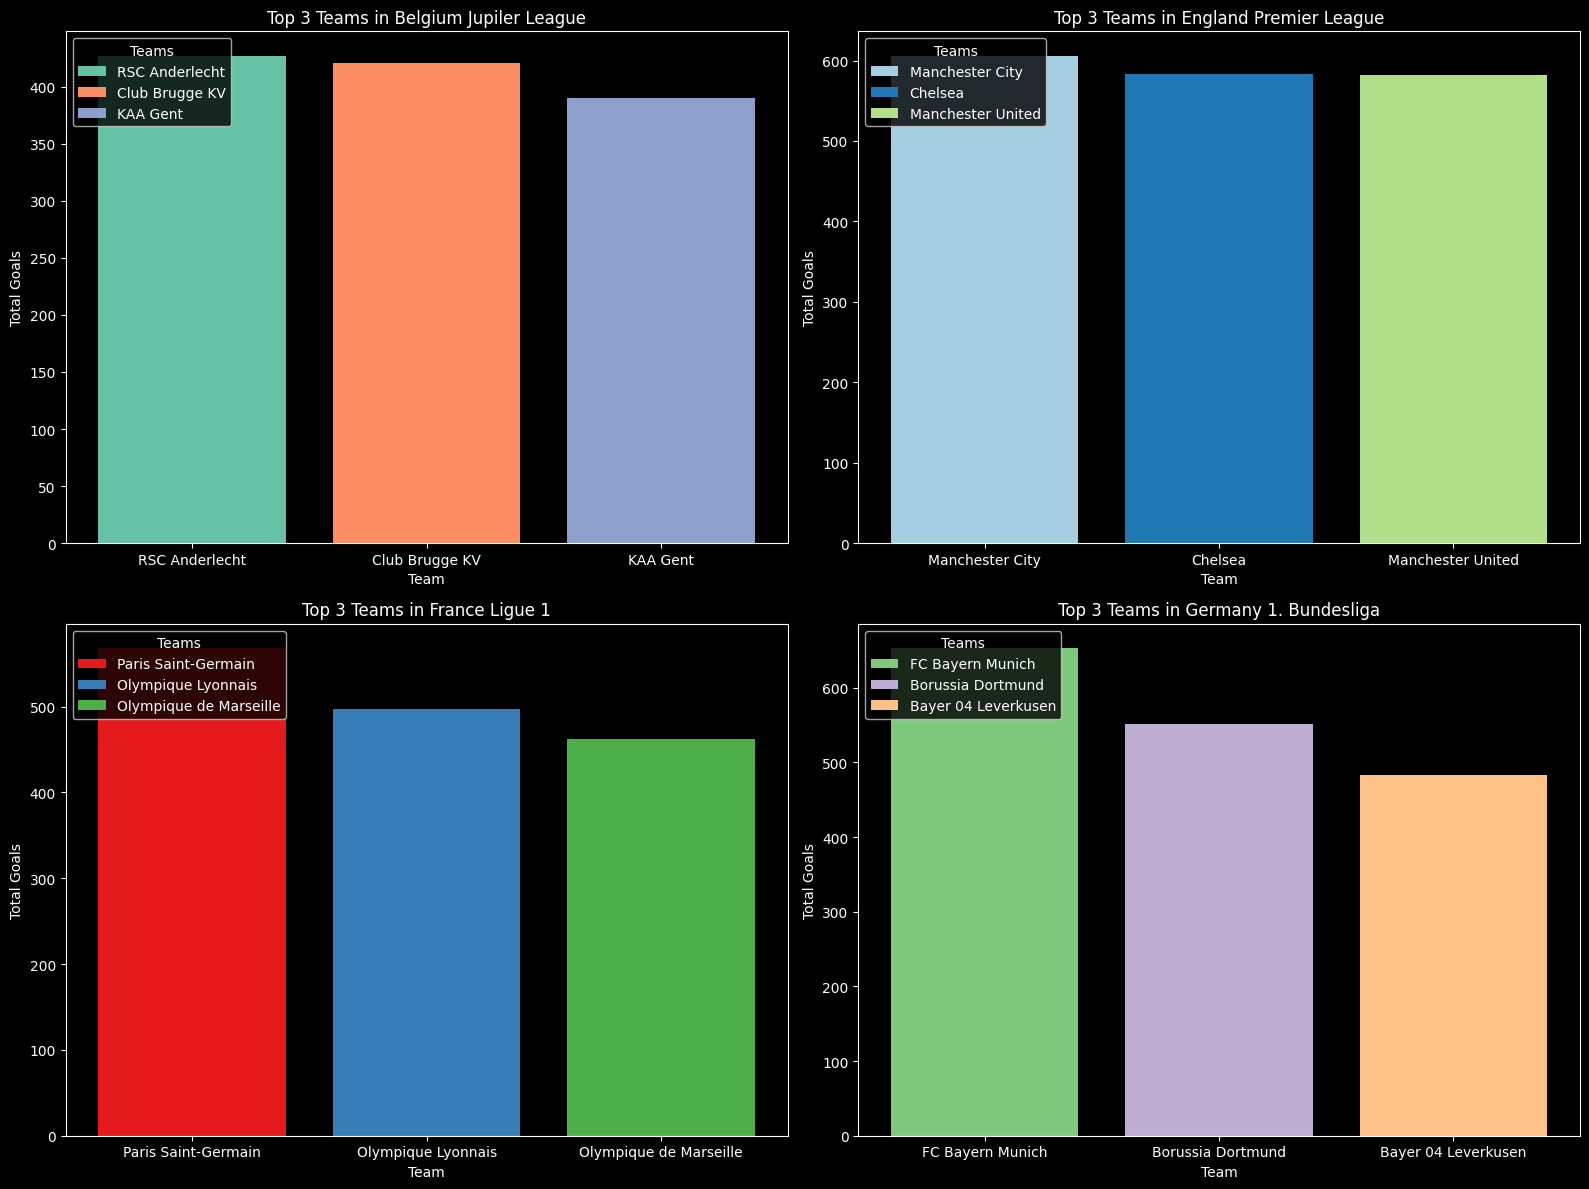

In [129]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Filtrer les trois premières équipes par ligue
top_3_teams_per_league = total_goals.sort_values(['name', 'total_goals'], ascending=[True, False])
top_3_teams_per_league = top_3_teams_per_league.groupby('name').head(3)

# Sélectionner les quatre premières ligues
top_4_leagues = top_3_teams_per_league['name'].unique()[:4]

# Filtrer les données pour ne conserver que les 4 premières ligues
filtered_data = top_3_teams_per_league[top_3_teams_per_league['name'].isin(top_4_leagues)]

# Créer 4 plots (2 par ligne)
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Palette de couleurs distinctes pour chaque graphique
colors_1 = sns.color_palette("Set2", 3)  # Palette avec 3 couleurs distinctes pour la 1ère ligue
colors_2 = sns.color_palette("Paired", 3)  # Palette avec 3 couleurs distinctes pour la 2ème ligue
colors_3 = sns.color_palette("Set1", 3)  # Palette pour la 3ème ligue
colors_4 = sns.color_palette("Accent", 3)  # Palette pour la 4ème ligue

# Graphique 1 pour la première ligue
league_1 = filtered_data[filtered_data['name'] == top_4_leagues[0]]
for i, (team, color) in enumerate(zip(league_1['team'], colors_1)):
    axs[0, 0].bar(team, league_1.iloc[i]['total_goals'], label=team, color=color)

axs[0, 0].set_title(f'Top 3 Teams in {top_4_leagues[0]}')
axs[0, 0].set_xlabel('Team')
axs[0, 0].set_ylabel('Total Goals')
axs[0, 0].legend(title="Teams", loc='upper left')

# Graphique 2 pour la deuxième ligue
league_2 = filtered_data[filtered_data['name'] == top_4_leagues[1]]
for i, (team, color) in enumerate(zip(league_2['team'], colors_2)):
    axs[0, 1].bar(team, league_2.iloc[i]['total_goals'], label=team, color=color)

axs[0, 1].set_title(f'Top 3 Teams in {top_4_leagues[1]}')
axs[0, 1].set_xlabel('Team')
axs[0, 1].set_ylabel('Total Goals')
axs[0, 1].legend(title="Teams", loc='upper left')

# Graphique 3 pour la troisième ligue
league_3 = filtered_data[filtered_data['name'] == top_4_leagues[2]]
for i, (team, color) in enumerate(zip(league_3['team'], colors_3)):
    axs[1, 0].bar(team, league_3.iloc[i]['total_goals'], label=team, color=color)

axs[1, 0].set_title(f'Top 3 Teams in {top_4_leagues[2]}')
axs[1, 0].set_xlabel('Team')
axs[1, 0].set_ylabel('Total Goals')
axs[1, 0].legend(title="Teams", loc='upper left')

# Graphique 4 pour la quatrième ligue
league_4 = filtered_data[filtered_data['name'] == top_4_leagues[3]]
for i, (team, color) in enumerate(zip(league_4['team'], colors_4)):
    axs[1, 1].bar(team, league_4.iloc[i]['total_goals'], label=team, color=color)

axs[1, 1].set_title(f'Top 3 Teams in {top_4_leagues[3]}')
axs[1, 1].set_xlabel('Team')
axs[1, 1].set_ylabel('Total Goals')
axs[1, 1].legend(title="Teams", loc='upper left')

# Ajuster l'affichage
plt.tight_layout()
plt.show()


In [153]:
player_attribut = pd.read_sql('select * from Player_Attributes',conn)
player_attribut =  player_attribut[['player_api_id','date','overall_rating','potential','finishing','heading_accuracy','acceleration','shot_power','aggression','interceptions','strength','standing_tackle','sliding_tackle','gk_diving','gk_handling']]

In [154]:
player_attribut.columns

Index(['player_api_id', 'date', 'overall_rating', 'potential', 'finishing',
       'heading_accuracy', 'acceleration', 'shot_power', 'aggression',
       'interceptions', 'strength', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling'],
      dtype='object')

In [155]:
player_attribut.isna().sum()

player_api_id          0
date                   0
overall_rating       836
potential            836
finishing            836
heading_accuracy     836
acceleration         836
shot_power           836
aggression           836
interceptions        836
strength             836
standing_tackle      836
sliding_tackle      2713
gk_diving            836
gk_handling          836
dtype: int64

In [156]:
player_attribut = player_attribut.dropna()

In [157]:
player = pd.read_sql('select * from player',conn)
player= player[['player_api_id','player_name']]

In [158]:
player

,player_api_id,player_name
0,505942,Aaron Appindangoye
1,155782,Aaron Cresswell
2,162549,Aaron Doran
3,30572,Aaron Galindo
4,23780,Aaron Hughes
...,...,...
11055,26357,Zoumana Camara
11056,111182,Zsolt Laczko
11057,36491,Zsolt Low
11058,35506,Zurab Khizanishvili


In [159]:
player_attribut = player_attribut.merge(player,on='player_api_id',how='left')

In [160]:
player_attribut.columns

Index(['player_api_id', 'date', 'overall_rating', 'potential', 'finishing',
       'heading_accuracy', 'acceleration', 'shot_power', 'aggression',
       'interceptions', 'strength', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'player_name'],
      dtype='object')

In [162]:
import pandas as pd

# Supposons que votre DataFrame s'appelle player_attributes
# 1. Créer une colonne "season" à partir de la colonne "date"
player_attribut['date'] = pd.to_datetime(player_attribut['date'])
player_attribut['season'] = player_attribut['date'].dt.year

# 2. Définir les positions des joueurs
# Cette partie dépend de la manière dont la position est stockée dans vos données (par exemple, 'position' dans une colonne).
# Si vous n'avez pas de colonne de position, il faudra l'ajouter ou estimer la position en fonction des attributs disponibles.
# Pour l'exemple, ajoutons une colonne fictive 'position' avec des valeurs 'Attacker', 'Defender', 'Goalkeeper'
# Vous devrez ajuster cette partie en fonction de votre propre jeu de données.
player_attribut['position'] = ['Attacker' if i % 3 == 0 else 'Defender' if i % 3 == 1 else 'Goalkeeper' for i in range(len(player_attribut))]

# 3. Définir une métrique de performance par position
# Pour chaque position, nous allons utiliser différents attributs pour le score de performance.
# On attribue des poids différents en fonction du type de joueur.

# Définir les poids pour chaque position
position_weights = {
    'Attacker': {
        'overall_rating': 0.3,
        'potential': 0.2,
        'finishing': 0.3,
        'acceleration': 0.1,
        'shot_power': 0.1
    },
    'Defender': {
        'overall_rating': 0.3,
        'potential': 0.2,
        'standing_tackle': 0.25,
        'sliding_tackle': 0.2,
        'interceptions': 0.25,
        'strength': 0.25
    },
    'Goalkeeper': {
        'overall_rating': 0.4,
        'potential': 0.3,
        'gk_diving': 0.1,
        'gk_handling': 0.1,
        'gk_positioning': 0.1,
        'gk_reflexes': 0.1
    }
}

# Calculer la métrique de performance par position
def calculate_performance(row):
    position = row['position']
    weights = position_weights.get(position, {})
    performance_score = sum(row[attr] * weight for attr, weight in weights.items() if attr in row)
    return performance_score

# Appliquer la fonction pour créer une colonne "performance_score"
player_attribut['performance_score'] = player_attribut.apply(calculate_performance, axis=1)

# 4. Trouver les meilleurs joueurs de chaque position par saison
best_players_per_season = player_attribut.groupby(['season', 'position']).apply(
    lambda x: x.loc[x['performance_score'].idxmax()]  # Trouver le joueur avec le score de performance maximal
)

# 5. Analyser les joueurs constants par position
# Calculer l'écart-type de la performance pour chaque joueur sur toutes les saisons
performance_variance_by_player = player_attribut.groupby(['player_name', 'position'])['performance_score'].std().reset_index()
performance_variance_by_player = performance_variance_by_player.rename(columns={'performance_score': 'performance_variance'})

# Filtrer les joueurs constants (écart-type faible)
constant_players = performance_variance_by_player[performance_variance_by_player['performance_variance'] < performance_variance_by_player['performance_variance'].quantile(0.25)]

# Afficher les meilleurs joueurs par position et les joueurs constants
print("Best players per season and position:\n", best_players_per_season[['player_name', 'season', 'position', 'performance_score']])
print("\nMost constant players per position:\n", constant_players[['player_name', 'position', 'performance_variance']])


Best players per season and position:
                          player_name  season    position  performance_score
season position                                                            
2007   Attacker        Thierry Henry    2007    Attacker              92.00
       Defender     Alessandro Nesta    2007    Defender             132.85
       Goalkeeper     Gregory Coupet    2007  Goalkeeper              83.10
2008   Attacker      Fernando Torres    2008    Attacker              90.60
       Defender       Javier Zanetti    2008    Defender             127.70
       Goalkeeper         Rene Adler    2008  Goalkeeper              79.10
2009   Attacker    Cristiano Ronaldo    2009    Attacker              91.60
       Defender         Carles Puyol    2009    Defender             131.80
       Goalkeeper      Iker Casillas    2009  Goalkeeper              81.60
2010   Attacker      Fernando Torres    2010    Attacker              91.00
       Defender        Nemanja Vidic    2010    D

/tmp/ipykernel_31152/2285546943.py:57: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  best_players_per_season = player_attribut.groupby(['season', 'position']).apply(


In [173]:
best_players_per_season[['player_name', 'season', 'position', 'performance_score']].columns

Index(['player_name', 'season', 'position', 'performance_score'], dtype='object')

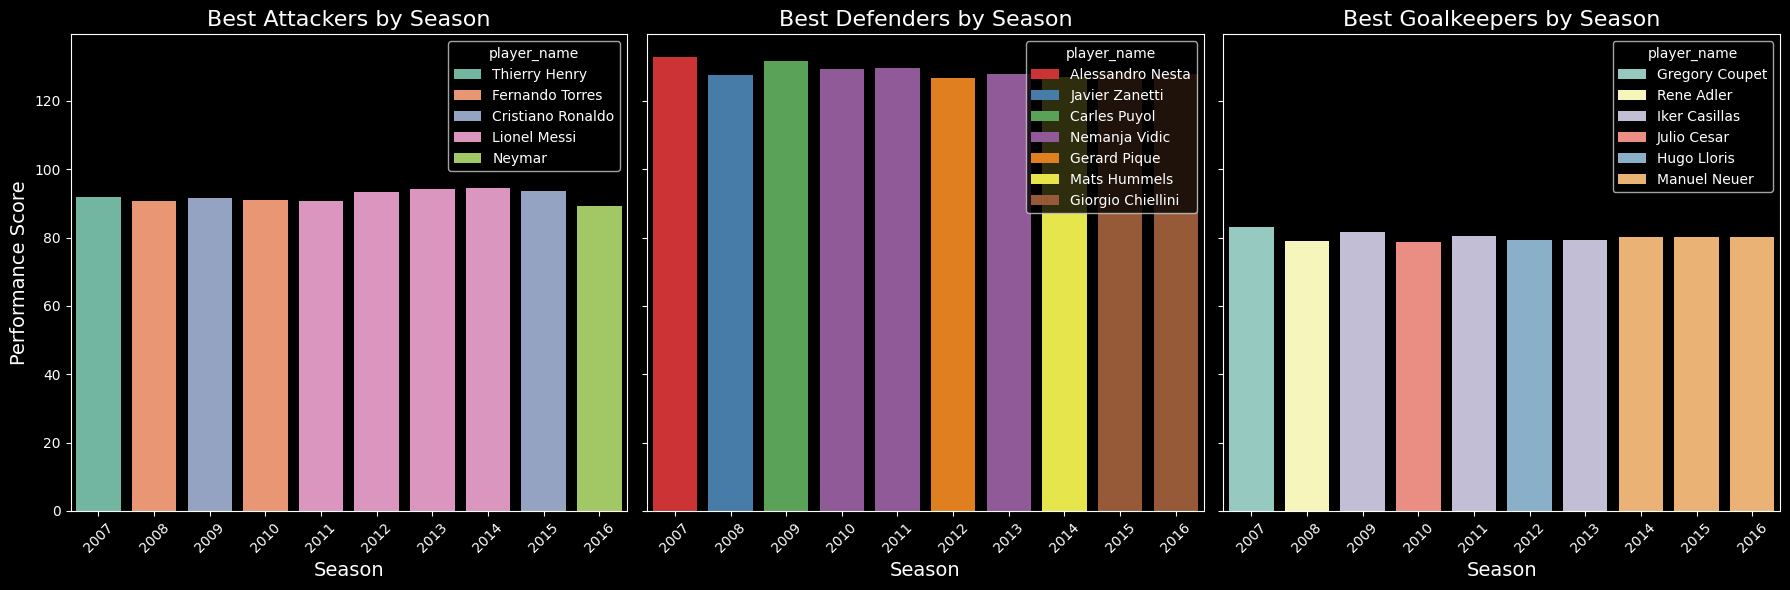

In [190]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration du fond sombre
plt.style.use('dark_background')

# Réinitialiser l'index si nécessaire pour éviter la confusion avec 'season'
best_players_per_season = best_players_per_season.reset_index(drop=True)

# Trouver le joueur le plus performant pour chaque position et saison
best_attackers = best_players_per_season[best_players_per_season['position'] == 'Attacker']
best_attackers = best_attackers.loc[best_attackers.groupby('season')['performance_score'].idxmax()]

best_defenders = best_players_per_season[best_players_per_season['position'] == 'Defender']
best_defenders = best_defenders.loc[best_defenders.groupby('season')['performance_score'].idxmax()]

best_goalkeepers = best_players_per_season[best_players_per_season['position'] == 'Goalkeeper']
best_goalkeepers = best_goalkeepers.loc[best_goalkeepers.groupby('season')['performance_score'].idxmax()]

# Création de la figure avec 3 sous-graphiques
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Graphique des attaquants
sns.barplot(data=best_attackers, x='season', y='performance_score', hue='player_name', palette='Set2', ax=axs[0])
axs[0].set_title('Best Attackers by Season', fontsize=16)
axs[0].set_xlabel('Season', fontsize=14)
axs[0].set_ylabel('Performance Score', fontsize=14)
axs[0].tick_params(axis='x', rotation=45)

# Graphique des défenseurs
sns.barplot(data=best_defenders, x='season', y='performance_score', hue='player_name', palette='Set1', ax=axs[1])
axs[1].set_title('Best Defenders by Season', fontsize=16)
axs[1].set_xlabel('Season', fontsize=14)
axs[1].set_ylabel('Performance Score', fontsize=14)
axs[1].tick_params(axis='x', rotation=45)

# Graphique des gardiens
sns.barplot(data=best_goalkeepers, x='season', y='performance_score', hue='player_name', palette='Set3', ax=axs[2])
axs[2].set_title('Best Goalkeepers by Season', fontsize=16)
axs[2].set_xlabel('Season', fontsize=14)
axs[2].set_ylabel('Performance Score', fontsize=14)
axs[2].tick_params(axis='x', rotation=45)

# Appliquer un fond sombre

# Ajuster la mise en page pour éviter les chevauchements
plt.tight_layout()

# Afficher le graphique
plt.show()


In [179]:
best_players_per_season

,player_api_id,date,overall_rating,potential,finishing,heading_accuracy,acceleration,shot_power,aggression,interceptions,strength,standing_tackle,sliding_tackle,gk_diving,gk_handling,player_name,season,position,performance_score
0,30626,2007-08-30,91.0,91.0,95.0,65.0,94.0,86.0,40.0,83.0,78.0,21.0,14.0,14.0,21.0,Thierry Henry,2007,Attacker,92.00
1,30723,2007-02-22,91.0,92.0,24.0,93.0,83.0,65.0,88.0,92.0,92.0,95.0,87.0,7.0,6.0,Alessandro Nesta,2007,Defender,132.85
2,39989,2007-02-22,92.0,93.0,2.0,12.0,55.0,22.0,88.0,18.0,89.0,13.0,12.0,93.0,91.0,Gregory Coupet,2007,Goalkeeper,83.10
3,30853,2008-08-30,88.0,90.0,95.0,79.0,95.0,82.0,63.0,78.0,76.0,20.0,29.0,10.0,20.0,Fernando Torres,2008,Attacker,90.60
4,30460,2008-08-30,86.0,86.0,48.0,76.0,80.0,86.0,81.0,91.0,90.0,89.0,86.0,10.0,21.0,Javier Zanetti,2008,Defender,127.70
5,27424,2008-08-30,86.0,90.0,23.0,23.0,52.0,23.0,40.0,50.0,62.0,23.0,12.0,92.0,85.0,Rene Adler,2008,Goalkeeper,79.10
6,30893,2009-02-22,90.0,94.0,91.0,82.0,95.0,90.0,54.0,68.0,76.0,31.0,23.0,9.0,21.0,Cristiano Ronaldo,2009,Attacker,91.60
7,30661,2009-08-30,88.0,90.0,37.0,83.0,69.0,63.0,89.0,91.0,93.0,92.0,92.0,8.0,23.0,Carles Puyol,2009,Defender,131.80
8,30657,2009-08-30,90.0,92.0,22.0,22.0,69.0,26.0,23.0,87.0,62.0,22.0,9.0,93.0,87.0,Iker Casillas,2009,Goalkeeper,81.60
9,30853,2010-02-22,88.0,91.0,95.0,81.0,93.0,86.0,72.0,78.0,77.0,20.0,29.0,9.0,20.0,Fernando Torres,2010,Attacker,91.00


In [182]:
best_players_per_season[best_players_per_season['position'] == 'Attacker']

,player_api_id,date,overall_rating,potential,finishing,heading_accuracy,acceleration,shot_power,aggression,interceptions,strength,standing_tackle,sliding_tackle,gk_diving,gk_handling,player_name,season,position,performance_score
0,30626,2007-08-30,91.0,91.0,95.0,65.0,94.0,86.0,40.0,83.0,78.0,21.0,14.0,14.0,21.0,Thierry Henry,2007,Attacker,92.0
3,30853,2008-08-30,88.0,90.0,95.0,79.0,95.0,82.0,63.0,78.0,76.0,20.0,29.0,10.0,20.0,Fernando Torres,2008,Attacker,90.6
6,30893,2009-02-22,90.0,94.0,91.0,82.0,95.0,90.0,54.0,68.0,76.0,31.0,23.0,9.0,21.0,Cristiano Ronaldo,2009,Attacker,91.6
9,30853,2010-02-22,88.0,91.0,95.0,81.0,93.0,86.0,72.0,78.0,77.0,20.0,29.0,9.0,20.0,Fernando Torres,2010,Attacker,91.0
12,30981,2011-02-22,90.0,94.0,92.0,69.0,94.0,79.0,48.0,22.0,59.0,21.0,20.0,6.0,11.0,Lionel Messi,2011,Attacker,90.7
15,30981,2012-08-31,94.0,96.0,95.0,73.0,95.0,80.0,48.0,22.0,67.0,21.0,20.0,6.0,11.0,Lionel Messi,2012,Attacker,93.4
18,30981,2013-03-22,94.0,97.0,97.0,72.0,95.0,80.0,48.0,22.0,65.0,21.0,20.0,6.0,11.0,Lionel Messi,2013,Attacker,94.2
21,30981,2014-04-25,94.0,97.0,97.0,71.0,96.0,81.0,48.0,22.0,60.0,21.0,20.0,6.0,11.0,Lionel Messi,2014,Attacker,94.4
24,30893,2015-10-16,93.0,93.0,95.0,86.0,91.0,94.0,62.0,29.0,79.0,31.0,23.0,7.0,11.0,Cristiano Ronaldo,2015,Attacker,93.5
27,19533,2016-02-04,90.0,94.0,88.0,62.0,91.0,78.0,56.0,36.0,45.0,24.0,33.0,9.0,9.0,Neymar,2016,Attacker,89.1


/tmp/ipykernel_31152/356761255.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=best_attackers_data, x='season', y='performance_score', hue='player_name', marker='o', ax=axs[0], palette='Set2', ci=None)
/tmp/ipykernel_31152/356761255.py:39: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=best_defenders_data, x='season', y='performance_score', hue='player_name', marker='o', ax=axs[1], palette='Set1', ci=None)
/tmp/ipykernel_31152/356761255.py:46: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=best_goalkeepers_data, x='season', y='performance_score', hue='player_name', marker='o', ax=axs[2], palette='Set3', ci=None)


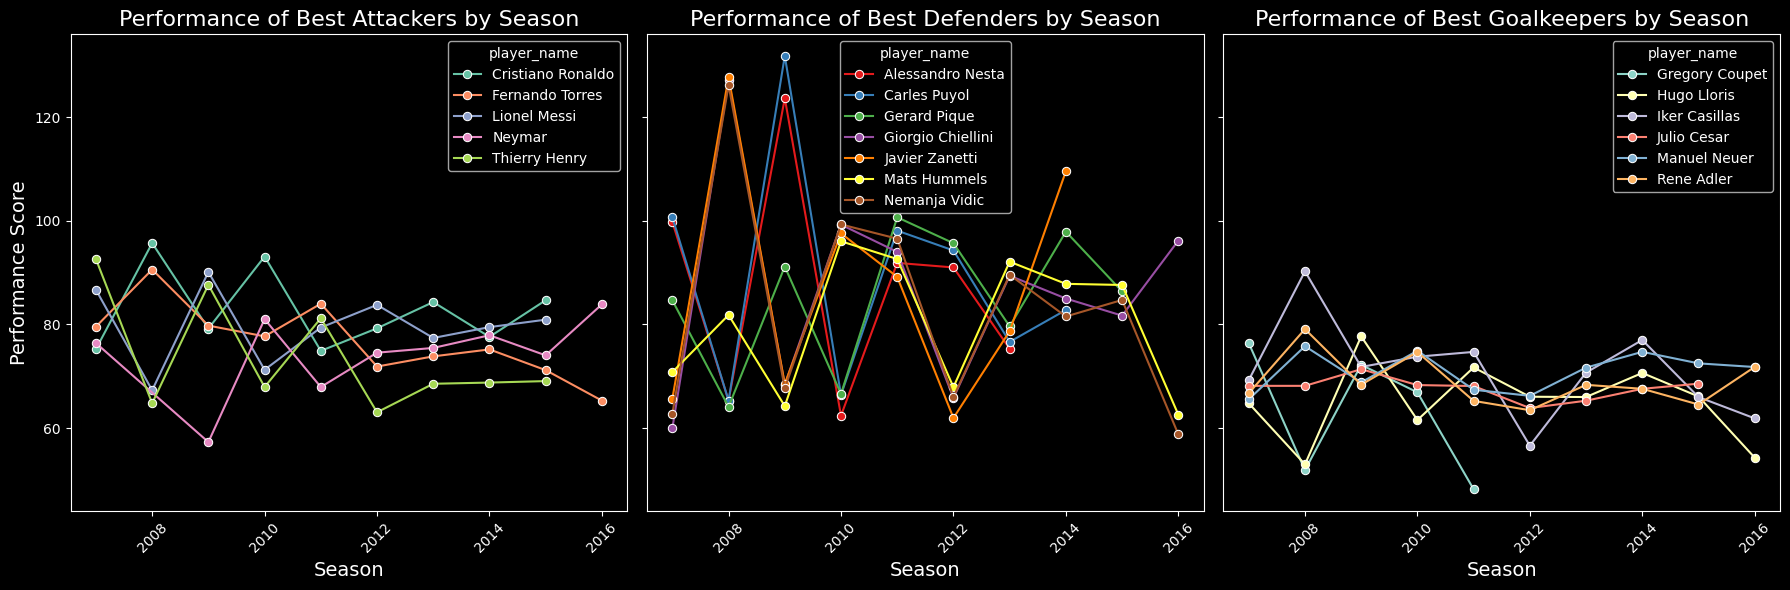

In [189]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration du fond sombre
plt.style.use('dark_background')

# Exemple de dataframe player_attribute contenant toutes les données des joueurs
# player_attribute = pd.DataFrame(...)

# 1. Extraire les meilleurs joueurs par position et saison depuis best_players_per_season
best_attackers = best_players_per_season[best_players_per_season['position'] == 'Attacker']
best_defenders = best_players_per_season[best_players_per_season['position'] == 'Defender']
best_goalkeepers = best_players_per_season[best_players_per_season['position'] == 'Goalkeeper']

# On récupère uniquement les noms des joueurs qui sont dans le top pour chaque position
best_attackers_names = best_attackers['player_name'].unique()
best_defenders_names = best_defenders['player_name'].unique()
best_goalkeepers_names = best_goalkeepers['player_name'].unique()

best_attackers_data = player_attribut[player_attribut['player_name'].isin(best_attackers_names)]
best_defenders_data = player_attribut[player_attribut['player_name'].isin(best_defenders_names)]
best_goalkeepers_data = player_attribut[player_attribut['player_name'].isin(best_goalkeepers_names)]


# 2. Filtrer les données de player_attribute pour obtenir les données des meilleursimport matplotlib.pyplot as plt

# Création de la figure avec 3 sous-graphiques
# Création de la figure avec 3 sous-graphiques
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# 3. Graphique des attaquants
sns.lineplot(data=best_attackers_data, x='season', y='performance_score', hue='player_name', marker='o', ax=axs[0], palette='Set2', ci=None)
axs[0].set_title('Performance of Best Attackers by Season', fontsize=16)
axs[0].set_xlabel('Season', fontsize=14)
axs[0].set_ylabel('Performance Score', fontsize=14)
axs[0].tick_params(axis='x', rotation=45)

# 4. Graphique des défenseurs
sns.lineplot(data=best_defenders_data, x='season', y='performance_score', hue='player_name', marker='o', ax=axs[1], palette='Set1', ci=None)
axs[1].set_title('Performance of Best Defenders by Season', fontsize=16)
axs[1].set_xlabel('Season', fontsize=14)
axs[1].set_ylabel('Performance Score', fontsize=14)
axs[1].tick_params(axis='x', rotation=45)

# 5. Graphique des gardiens
sns.lineplot(data=best_goalkeepers_data, x='season', y='performance_score', hue='player_name', marker='o', ax=axs[2], palette='Set3', ci=None)
axs[2].set_title('Performance of Best Goalkeepers by Season', fontsize=16)
axs[2].set_xlabel('Season', fontsize=14)
axs[2].set_ylabel('Performance Score', fontsize=14)
axs[2].tick_params(axis='x', rotation=45)

# Ajuster la mise en page pour éviter les chevauchements
plt.tight_layout()

# Afficher le graphique
plt.show()

